### Dow Jones Index Data
#### Joe Laslie
#### Feb. 2021
---

### 1. Objective of Analysis

> Perform clustering methods on Dow Jones Index Data and examine resulting structure. 

> Perform PCA to possibly simplify data.

### 2. Description of Data

> Data comes from the UCI Machine Learning Repository [(link to data)](https://archive.ics.uci.edu/ml/datasets/Dow+Jones+Index)

> 16 features. Each row represents a week's worth of data for a particular stock. There are 30 unique stocks with 25 weeks of data for each stock. 

> Features explained as follows:
- **quarter:** the yearly quarter (1 = Jan-Mar; 2 = Apr-Jun)
- **stock:** stock symbol
- **date:** the last business day of the work week (this is typically a Friday)
- **open:** the price of stock at the beginning of the week
- **high:** the highest price of the stock during the week
- **low:** the lowest price of the stock during the week
- **close:** the price of the stock at the end of the week
- **volume:** the number of shares of stock that traded hands in the week
- **percent_change_price:** the percentage change in price throughout the week
- **percent_change_volume_over_last_wk:** the percentage change in the number of shares of stock that traded hands for this week compared to the previous week
- **previous_weeks_volume:** the number of shares of stock that traded hands in the previous week
- **next_weeks_open:** the opening price of the stock in the following week
- **next_weeks_close:** the closing price of the stock in the following week
- **percent_change_next_weeks_price:** the percentage change in price of the stock in the following week
- **days_to_next_dividend:** the number of days until the next dividend
- **percent_return_next_dividend:** the percentage of return on the next dividend

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
os.chdir('C:\\Users\\lasli\\Documents\\Independent Work\\Dow Jones Index Data')

raw_data = pd.read_csv('dow_jones_index.data')
raw_data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [3]:
raw_data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:
with open("dow_jones_index.names") as f:
    print(f.read())

1. Title

: Weekly stock data for Dow Jones Index

2. Source:

 This dataset comprises data reported by the major stock exchanges.

3. Past Usage
This dataset was first used in:

Brown, M. S., Pelosi, M. & Dirska, H. (2013). Dynamic-radius Species-conserving Genetic Algorithm for 
the Financial Forecasting of Dow Jones Index Stocks. Machine Learning and Data Mining in Pattern 
Recognition, 7988, 27-41.

We request that you provide a citation to this paper when using the dataset.  We welcome you to 
compare your results against ours in (Brown, Pelosi & Dirska, 2013).



4. Relevant Information
	In predicting stock prices you collect data over some period of time - day, week, month, etc.
	But you cannot take advantage of data from a time period until the next increment of the time period. 
	For example, assume you collect data daily.  When Monday is over you have all of the data
	for that day.  However you can invest on Monday, because you don't get the data until the
	end of the day.  Y

In [5]:
raw_data.shape

(750, 16)

In [6]:
raw_data.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

In [7]:
raw_data['stock'].value_counts()

MSFT    25
BAC     25
KRFT    25
WMT     25
JPM     25
CVX     25
MCD     25
INTC    25
JNJ     25
VZ      25
MMM     25
HD      25
XOM     25
DIS     25
AA      25
IBM     25
CAT     25
BA      25
TRV     25
PG      25
T       25
HPQ     25
CSCO    25
UTX     25
GE      25
PFE     25
DD      25
AXP     25
KO      25
MRK     25
Name: stock, dtype: int64

In [8]:
raw_data.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null object
open                                  750 non-null object
high                                  750 non-null object
low                                   750 non-null object
close                                 750 non-null object
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_return_next_divi

In [10]:
raw_data.isnull().values.any()

True

In [11]:
raw_data.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [12]:
# delete rows with missing observations
raw_drop_na = raw_data.dropna(axis=0)

In [13]:
raw_drop_na.shape

(720, 16)

In [14]:
round(raw_drop_na.describe(), 2)

,quarter,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,720.00,7.200000e+02,720.00,720.00,7.200000e+02,720.00,720.00,720.00
mean,1.54,1.156040e+08,0.03,5.59,1.173876e+08,0.19,52.26,0.69
std,0.50,1.520844e+08,2.50,40.54,1.592322e+08,2.66,45.88,0.31
min,1.00,9.718851e+06,-15.42,-61.43,9.718851e+06,-15.42,0.00,0.07
25%,1.00,3.069225e+07,-1.30,-19.80,3.067832e+07,-1.25,24.00,0.53
50%,2.00,5.274535e+07,0.00,0.51,5.294556e+07,0.04,47.00,0.68
75%,2.00,1.311530e+08,1.63,21.80,1.333230e+08,1.79,69.25,0.85
max,2.00,1.054415e+09,9.88,327.41,1.453439e+09,9.88,329.00,1.56


### 3. Data Cleaning, Feature Engineering, Data Exploration

> One hot encode stocks and dates

> Convert necessary columns to floats (open, high, low, close, volume, next_weeks_open, next_weeks_close)

> Scale data for unsupervised learning

In [15]:
raw_drop_na.dtypes[raw_drop_na.dtypes == np.object]

stock               object
date                object
open                object
high                object
low                 object
close               object
next_weeks_open     object
next_weeks_close    object
dtype: object

In [16]:
data = pd.get_dummies(raw_drop_na, columns = ['stock', 'date'])
data.columns

Index(['quarter', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend', 'stock_AA', 'stock_AXP', 'stock_BA',
       'stock_BAC', 'stock_CAT', 'stock_CSCO', 'stock_CVX', 'stock_DD',
       'stock_DIS', 'stock_GE', 'stock_HD', 'stock_HPQ', 'stock_IBM',
       'stock_INTC', 'stock_JNJ', 'stock_JPM', 'stock_KO', 'stock_KRFT',
       'stock_MCD', 'stock_MMM', 'stock_MRK', 'stock_MSFT', 'stock_PFE',
       'stock_PG', 'stock_T', 'stock_TRV', 'stock_UTX', 'stock_VZ',
       'stock_WMT', 'stock_XOM', 'date_1/14/2011', 'date_1/21/2011',
       'date_1/28/2011', 'date_2/11/2011', 'date_2/18/2011', 'date_2/25/2011',
       'date_2/4/2011', 'date_3/11/2011', 'date_3/18/2011', 'date_3/25/2011',
       'date_3/4/2011', 'date_4/1/2011', 'date_4/15/2011', 'date_4/21/2011'

In [17]:
data.shape

(720, 68)

In [18]:
data.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,...,date_4/29/2011,date_4/8/2011,date_5/13/2011,date_5/20/2011,date_5/27/2011,date_5/6/2011,date_6/10/2011,date_6/17/2011,date_6/24/2011,date_6/3/2011
1,1,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,...,0,0,0,0,0,0,0,0,0,0
2,1,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,...,0,0,0,0,0,0,0,0,0,0
3,1,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,...,0,0,0,0,0,0,0,0,0,0
4,1,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,...,0,0,0,0,0,0,0,0,0,0
5,1,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# get rid of $ sign in columns
dollar_columns = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']

for i in dollar_columns:
    data[i] = data[i].str.replace('$', '').astype(float)

In [20]:
data.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,...,date_4/29/2011,date_4/8/2011,date_5/13/2011,date_5/20/2011,date_5/27/2011,date_5/6/2011,date_6/10/2011,date_6/17/2011,date_6/24/2011,date_6/3/2011
1,1,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,...,0,0,0,0,0,0,0,0,0,0
2,1,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,...,0,0,0,0,0,0,0,0,0,0
3,1,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,...,0,0,0,0,0,0,0,0,0,0
4,1,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,...,0,0,0,0,0,0,0,0,0,0
5,1,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.dtypes.value_counts()

uint8      54
float64    11
int64       3
dtype: int64

In [22]:
# change 'volume' column to float
data['volume'] = data['volume'].astype(float)

In [23]:
data.dtypes.value_counts()

uint8      54
float64    12
int64       2
dtype: int64

> Look at correlation between variables

In [24]:
feature_correlations = data.corr()

tril_index = np.tril_indices_from(feature_correlations)

correlations_array = np.array(feature_correlations)
correlations_array[tril_index] = np.nan

feature_correlations = pd.DataFrame(correlations_array, columns=feature_correlations.columns, index=feature_correlations.index)

feature_correlations = (feature_correlations
                        .stack()
                        .to_frame()
                        .reset_index()
                        .rename(columns={'level_0': 'Feature_1',
                                         'level_1': 'Feature_2',
                                        0: 'Correlation'}))

feature_correlations['Abs_Correlation'] = feature_correlations['Correlation'].abs()
feature_correlations.sort_values(by='Correlation')

,Feature_1,Feature_2,Correlation,Abs_Correlation
199,low,volume,-0.524210,0.524210
262,close,volume,-0.523935,0.523935
328,volume,next_weeks_open,-0.523710,0.523710
329,volume,next_weeks_close,-0.523208,0.523208
70,open,volume,-0.522450,0.522450
...,...,...,...,...
139,high,next_weeks_open,0.999476,0.999476
198,low,close,0.999549,0.999549
134,high,close,0.999555,0.999555
67,open,high,0.999613,0.999613


In [25]:
data.dtypes[data.dtypes == np.float]

open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                float64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                       float64
next_weeks_close                      float64
percent_change_next_weeks_price       float64
percent_return_next_dividend          float64
dtype: object

In [26]:
float_columns = ['open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'percent_return_next_dividend']


In [27]:
feature_correlations = data[float_columns].corr()

tril_index = np.tril_indices_from(feature_correlations)

correlations_array = np.array(feature_correlations)
correlations_array[tril_index] = np.nan

feature_correlations = pd.DataFrame(correlations_array, columns=feature_correlations.columns, index=feature_correlations.index)

feature_correlations = (feature_correlations
                        .stack()
                        .to_frame()
                        .reset_index()
                        .rename(columns={'level_0': 'Feature_1',
                                         'level_1': 'Feature_2',
                                        0: 'Correlation'}))

feature_correlations['Abs_Correlation'] = feature_correlations['Correlation'].abs()
feature_correlations.sort_values(by='Correlation')

,Feature_1,Feature_2,Correlation,Abs_Correlation
22,low,volume,-0.524210,0.524210
30,close,volume,-0.523935,0.523935
41,volume,next_weeks_open,-0.523710,0.523710
42,volume,next_weeks_close,-0.523208,0.523208
3,open,volume,-0.522450,0.522450
...,...,...,...,...
17,high,next_weeks_open,0.999476,0.999476
21,low,close,0.999549,0.999549
12,high,close,0.999555,0.999555
0,open,high,0.999613,0.999613


In [28]:
import seaborn as sns

sns.set_context('notebook')
sns.set_palette('pastel')
sns.set_style('white')

sns.pairplot(data[float_columns])

> Look at skew values

In [29]:
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns

previous_weeks_volume                 3.256532
volume                                2.868761
percent_change_volume_over_last_wk    2.544001
low                                   1.281314
next_weeks_close                      1.280180
close                                 1.275546
next_weeks_open                       1.274181
open                                  1.271666
high                                  1.271656
percent_return_next_dividend          0.398394
percent_change_next_weeks_price      -0.137200
percent_change_price                 -0.414007
dtype: float64

> Try cube root transform on skewed columns


In [30]:
skew_columns = skew_columns.loc[skew_columns > 0.75]

for col in skew_columns.index.tolist():
    data[col] = np.cbrt(data[col])

In [31]:
data

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,...,date_4/29/2011,date_4/8/2011,date_5/13/2011,date_5/20/2011,date_5/27/2011,date_5/6/2011,date_6/10/2011,date_6/17/2011,date_6/24/2011,date_6/3/2011
1,1,2.556577,2.556577,2.500800,2.518266,623.993814,-4.428490,1.113396,621.149114,2.529777,...,0,0,0,0,0,0,0,0,0,0
2,1,2.529777,2.539635,2.498666,2.508769,517.299231,-2.470660,-3.504076,623.993814,2.512999,...,0,0,0,0,0,0,0,0,0,0
3,1,2.512999,2.552490,2.510357,2.526648,532.952752,1.638310,2.107119,517.299231,2.529256,...,0,0,0,0,0,0,0,0,0,0
4,1,2.529256,2.590796,2.529256,2.578321,536.460343,5.933250,1.257281,532.952752,2.587813,...,0,0,0,0,0,0,0,0,0,0
5,1,2.587813,2.595258,2.569768,2.589802,485.858866,0.230814,-2.951524,536.460343,2.590796,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,4.312816,4.355579,4.310126,4.355579,408.626886,3.004240,-2.774415,442.694927,4.366970,...,0,0,0,0,1,0,0,0,0,0
746,2,4.366970,4.375170,4.312099,4.329951,428.388224,-2.521610,2.478267,408.626886,4.325502,...,0,0,0,0,0,0,0,0,0,1
747,2,4.325502,4.342184,4.303836,4.304916,452.057808,-1.420980,2.596668,428.388224,4.308869,...,0,0,0,0,0,0,1,0,0,0
748,2,4.308869,4.323541,4.278676,4.291202,464.964193,-1.225000,2.065495,452.057808,4.284494,...,0,0,0,0,0,0,0,1,0,0


In [32]:
data[float_columns].skew().sort_values(ascending=False)

previous_weeks_volume                 1.248195
volume                                1.208808
percent_return_next_dividend          0.398394
high                                  0.288950
open                                  0.285054
next_weeks_open                       0.283376
next_weeks_close                      0.282736
close                                 0.282267
low                                   0.280726
percent_change_volume_over_last_wk    0.091051
percent_change_next_weeks_price      -0.137200
percent_change_price                 -0.414007
dtype: float64

> Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head()

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,...,date_4/29/2011,date_4/8/2011,date_5/13/2011,date_5/20/2011,date_5/27/2011,date_5/6/2011,date_6/10/2011,date_6/17/2011,date_6/24/2011,date_6/3/2011
1,1,-1.453212,-1.477523,-1.500871,-1.499772,1.235438,-1.781209,0.339248,1.196561,-1.483745,...,0,0,0,0,0,0,0,0,0,0
2,1,-1.489584,-1.500406,-1.503776,-1.512608,0.561816,-0.999062,-1.268067,1.214316,-1.506422,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.512355,-1.483043,-1.487860,-1.488444,0.660645,0.642459,0.685157,0.548414,-1.484449,...,0,0,0,0,0,0,0,0,0,0
4,1,-1.490291,-1.431302,-1.462131,-1.418609,0.682791,2.358274,0.389333,0.646111,-1.405306,...,0,0,0,0,0,0,0,0,0,0
5,1,-1.410819,-1.425276,-1.406981,-1.403092,0.363316,0.080168,-1.075727,0.668002,-1.401275,...,0,0,0,0,0,0,0,0,0,0


In [34]:
round(data[float_columns].describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
open,720.0,-0.0,1.0,-1.94,-0.71,-0.06,0.74,2.63
high,720.0,0.0,1.0,-1.93,-0.70,-0.06,0.75,2.60
low,720.0,-0.0,1.0,-1.93,-0.74,-0.06,0.73,2.60
close,720.0,0.0,1.0,-1.94,-0.68,-0.06,0.74,2.59
volume,720.0,0.0,1.0,-1.36,-0.73,-0.34,0.50,3.72
percent_change_price,720.0,-0.0,1.0,-6.17,-0.53,-0.01,0.64,3.94
percent_change_volume_over_last_wk,720.0,-0.0,1.0,-1.42,-0.99,0.23,0.92,2.35
previous_weeks_volume,720.0,-0.0,1.0,-1.35,-0.73,-0.34,0.51,4.39
next_weeks_open,720.0,0.0,1.0,-1.94,-0.69,-0.06,0.74,2.62
next_weeks_close,720.0,0.0,1.0,-1.94,-0.68,-0.07,0.74,2.63


> Pairplot of transformed and scaled features

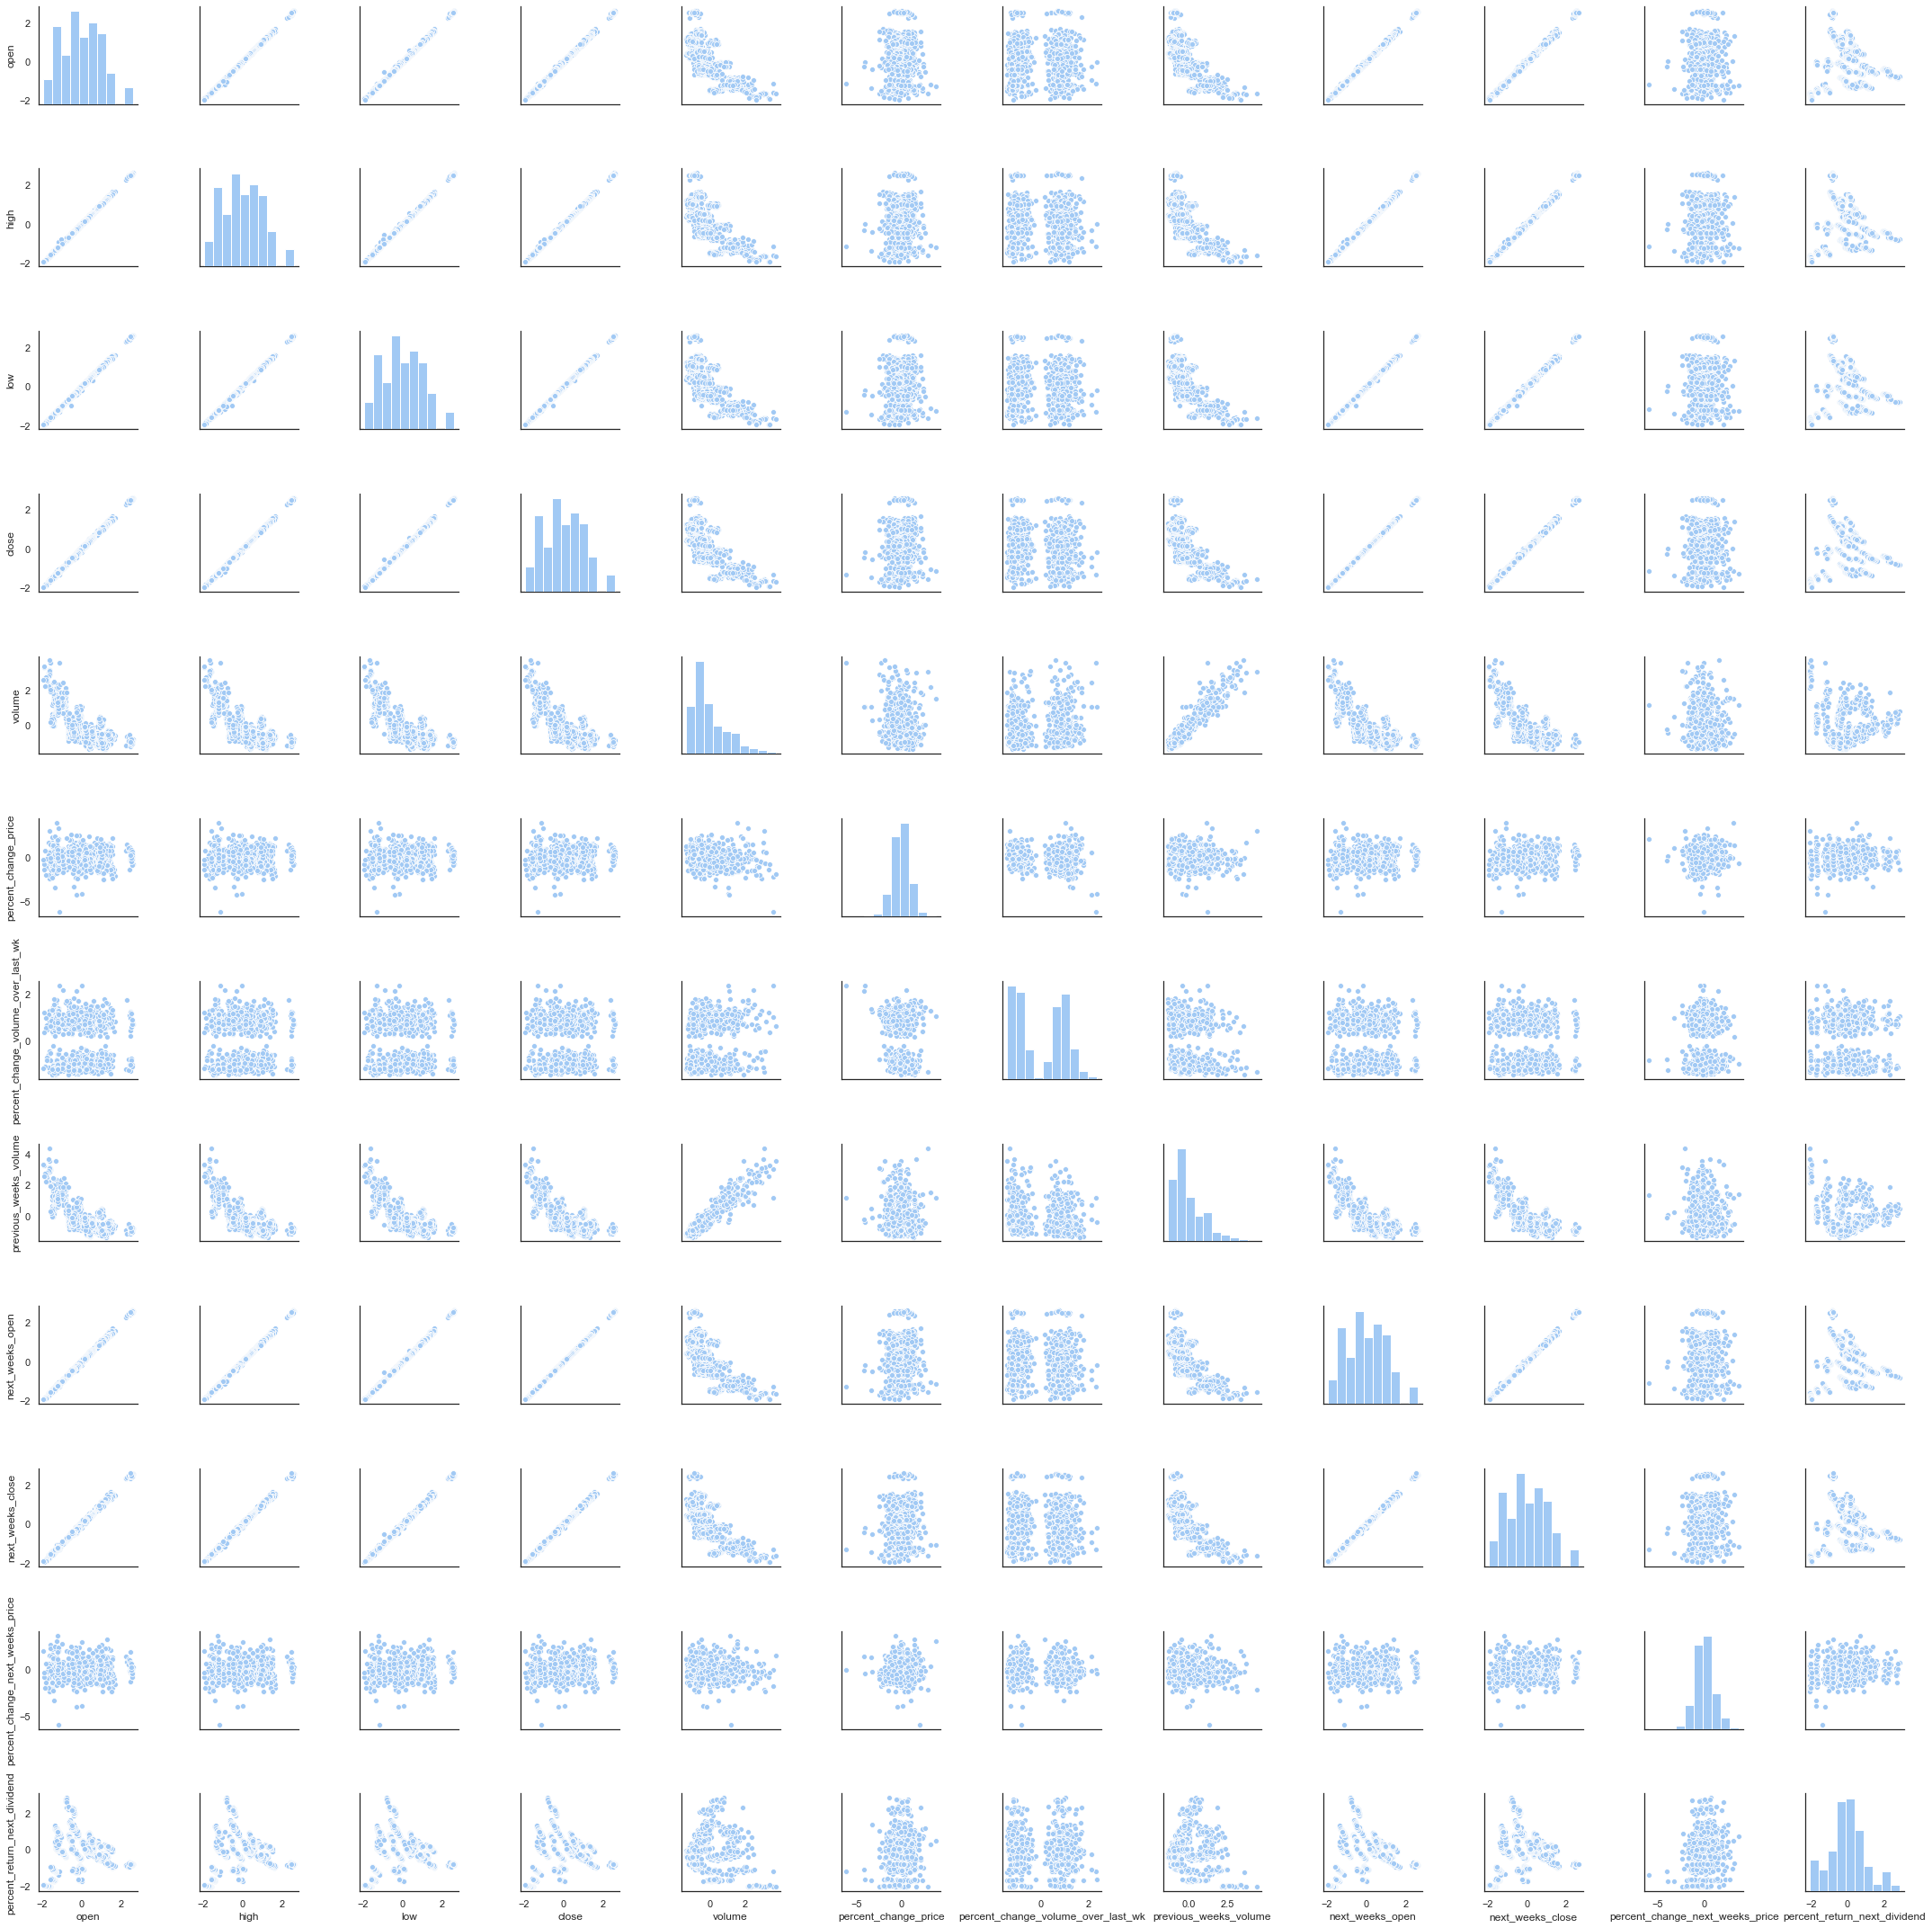

In [35]:
sns.set_context('notebook')
sns.set_palette('pastel')
sns.set_style('white')

sns.pairplot(data[float_columns])

### 4. Modeling

##### 4.1 K-means

In [36]:
from sklearn.cluster import KMeans

km_list = []

for cluster in range(1,21):
    km = KMeans(n_clusters=cluster, random_state=20)
    km = km.fit(data)
    
    km_list.append(pd.Series({'clusters': cluster,
                              'inertia': km.inertia_,
                              'model': km}))

km_results = pd.concat(km_list, axis=1)

In [37]:
km_results = km_results.T
km_results

,clusters,inertia,model
0,1,1.52381e+06,"KMeans(algorithm='auto', copy_x=True, init='k-..."
1,2,567226,"KMeans(algorithm='auto', copy_x=True, init='k-..."
2,3,193474,"KMeans(algorithm='auto', copy_x=True, init='k-..."
3,4,123970,"KMeans(algorithm='auto', copy_x=True, init='k-..."
4,5,81707,"KMeans(algorithm='auto', copy_x=True, init='k-..."
5,6,57644.9,"KMeans(algorithm='auto', copy_x=True, init='k-..."
6,7,46313.8,"KMeans(algorithm='auto', copy_x=True, init='k-..."
7,8,38279.7,"KMeans(algorithm='auto', copy_x=True, init='k-..."
8,9,31641.9,"KMeans(algorithm='auto', copy_x=True, init='k-..."
9,10,27566.8,"KMeans(algorithm='auto', copy_x=True, init='k-..."


[Text(0, 0.5, 'Inertia'), Text(0.5, 0, 'Cluster'), Text(0.5, 1.0, 'K-means')]

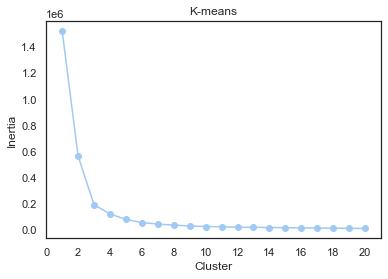

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(km_results['clusters'], km_results['inertia'], marker='o', ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(title='K-means', xlabel='Cluster', ylabel='Inertia')

##### 4.2 Heirarchical Agglomerative Clustering

> Create dendrograms to try to help decide on number of clusters

In [39]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

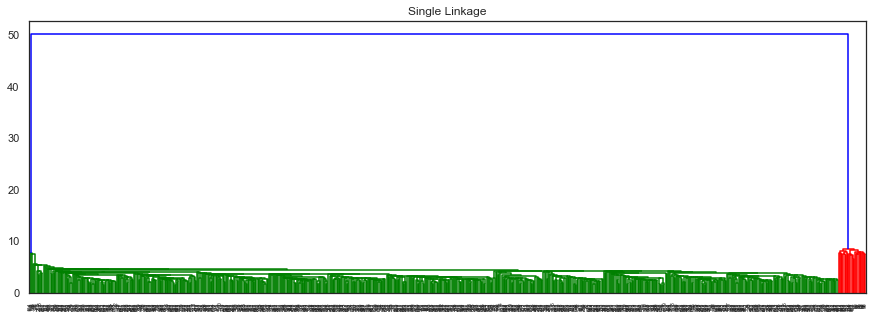

In [40]:
plt.figure(figsize=(15,5))
plt.title("Single Linkage")
dend_single = shc.dendrogram(shc.linkage(data, method='single'))

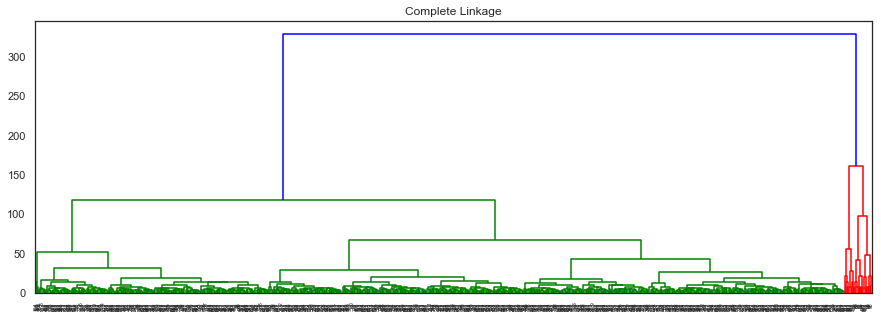

In [41]:
plt.figure(figsize=(15,5))
plt.title("Complete Linkage")
dend_complete = shc.dendrogram(shc.linkage(data, method='complete'))

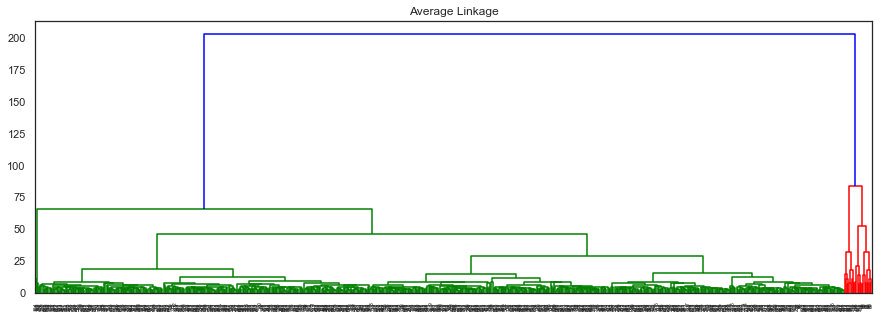

In [42]:
plt.figure(figsize=(15,5))
plt.title("Average Linkage")
dend_average = shc.dendrogram(shc.linkage(data, method='average'))

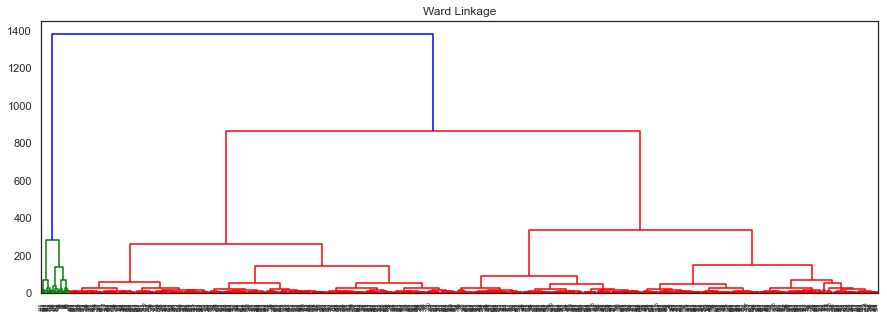

In [43]:
plt.figure(figsize=(15,5))
plt.title("Ward Linkage")
dend_ward = shc.dendrogram(shc.linkage(data, method='ward'))

##### 4.3 DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
eps = [1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00]
n_clu = [3, 4, 5, 6, 7]

dbscan_list = []

for i in eps:
    for j in n_clu:
        db = DBSCAN(eps=i, min_samples=j)
        db = db.fit(data)
        
        dbscan_list.append(pd.Series({'epsilon': i,
                                      'n_clu': j,
                                      'clusters': len(set(db.labels_))}))
        
dbscan_results = pd.concat(dbscan_list, axis=1)
dbscan_results = dbscan_results.T
dbscan_results = pd.DataFrame(dbscan_results)
dbscan_results

,epsilon,n_clu,clusters
0,1.00,3.0,1.0
1,1.00,4.0,1.0
2,1.00,5.0,1.0
3,1.00,6.0,1.0
4,1.00,7.0,1.0
5,1.25,3.0,1.0
6,1.25,4.0,1.0
7,1.25,5.0,1.0
8,1.25,6.0,1.0
9,1.25,7.0,1.0


In [46]:
dbscan_results.iloc[:21,:]

,epsilon,n_clu,clusters
0,1.00,3.0,1.0
1,1.00,4.0,1.0
2,1.00,5.0,1.0
3,1.00,6.0,1.0
4,1.00,7.0,1.0
5,1.25,3.0,1.0
6,1.25,4.0,1.0
7,1.25,5.0,1.0
8,1.25,6.0,1.0
9,1.25,7.0,1.0


In [47]:
dbscan_results.iloc[21:42,:]

,epsilon,n_clu,clusters
21,2.00,4.0,1.0
22,2.00,5.0,1.0
23,2.00,6.0,1.0
24,2.00,7.0,1.0
25,2.25,3.0,25.0
26,2.25,4.0,3.0
27,2.25,5.0,1.0
28,2.25,6.0,1.0
29,2.25,7.0,1.0
30,2.50,3.0,52.0


In [48]:
dbscan_results.iloc[42:,:]

,epsilon,n_clu,clusters
42,3.0,5.0,20.0
43,3.0,6.0,17.0
44,3.0,7.0,14.0


In [49]:
dbscan_results.groupby(['epsilon']).mean()

,n_clu,clusters
epsilon,,
1.00,5.0,1.0
1.25,5.0,1.0
1.50,5.0,1.0
1.75,5.0,1.0
2.00,5.0,2.4
2.25,5.0,6.2
2.50,5.0,15.6
2.75,5.0,26.0
3.00,5.0,24.6


In [50]:
dbscan_results.groupby(['n_clu']).mean()

,epsilon,clusters
n_clu,,
3.0,2.0,21.000000
4.0,2.0,9.222222
5.0,2.0,5.888889
6.0,2.0,4.333333
7.0,2.0,3.333333


In [51]:
dbscan_results.groupby(['clusters']).mean()

,epsilon,n_clu
clusters,,
1.0,1.598214,5.25
2.0,2.500000,6.00
3.0,2.250000,4.00
8.0,2.250000,4.00
9.0,2.750000,7.00
14.0,2.875000,6.50
15.0,2.500000,4.00
17.0,3.000000,6.00
19.0,2.750000,5.00


##### 4.4 Mean Shift

In [52]:
from sklearn.cluster import MeanShift

In [53]:
bandwidth = [5, 10, 20, 35, 50, 75, 100, 150, 200, 300, 400, 500]

ms_list = []

for b in bandwidth:
    ms = MeanShift(bandwidth=b)
    ms = ms.fit(data)
    
    ms_list.append(pd.Series({'bandwidth': b,
                             'clusters': len(set(ms.labels_))}))
    
ms_results = pd.concat(ms_list, axis=1)
ms_results = ms_results.T
ms_results

,bandwidth,clusters
0,5,44
1,10,17
2,20,9
3,35,4
4,50,3
5,75,2
6,100,2
7,150,1
8,200,1
9,300,1


##### 4.5 PCA

> PCA on float columns

In [54]:
data_float = data[float_columns]

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca_list = []
feature_weight_list = []

for n in range(1,6):
    
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_float)
    
    pca_list.append(pd.Series({'# of components': n,
                               'model': PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # feature importances
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    overall_contribution = np.abs(PCAmod.components_)*weights
    abs_feature_values = overall_contribution.sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'# of components': n,
                                             'features': data_float.columns,
                                             'feature importances': abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('# of components')
pca_df

,model,var
# of components,,
1,"PCA(copy=True, iterated_power='auto', n_compon...",0.607851
2,"PCA(copy=True, iterated_power='auto', n_compon...",0.711313
3,"PCA(copy=True, iterated_power='auto', n_compon...",0.811354
4,"PCA(copy=True, iterated_power='auto', n_compon...",0.889659
5,"PCA(copy=True, iterated_power='auto', n_compon...",0.954909


In [57]:
features_df = (pd.concat(feature_weight_list)
              .pivot(index='# of components', columns='features', values='feature importances'))

features_df

features,close,high,low,next_weeks_close,next_weeks_open,open,percent_change_next_weeks_price,percent_change_price,percent_change_volume_over_last_wk,percent_return_next_dividend,previous_weeks_volume,volume
# of components,,,,,,,,,,,,
1,0.125629,0.125493,0.125572,0.125636,0.125622,0.125461,0.012943,0.017849,0.000926,0.002257,0.106135,0.106477
2,0.113342,0.114161,0.113653,0.113161,0.113352,0.114524,0.016263,0.049371,0.033907,0.018740,0.094462,0.105065
3,0.103816,0.104390,0.103964,0.102846,0.103821,0.104611,0.034334,0.049780,0.046868,0.048153,0.096451,0.100965
4,0.098155,0.098770,0.098239,0.098444,0.098139,0.098828,0.060927,0.047874,0.046812,0.056925,0.096715,0.100171
5,0.093777,0.094241,0.093894,0.094031,0.093790,0.094791,0.059334,0.064926,0.060992,0.058067,0.093087,0.099068


In [58]:
features_df.T

# of components,1,2,3,4,5
features,,,,,
close,0.125629,0.113342,0.103816,0.098155,0.093777
high,0.125493,0.114161,0.104390,0.098770,0.094241
low,0.125572,0.113653,0.103964,0.098239,0.093894
next_weeks_close,0.125636,0.113161,0.102846,0.098444,0.094031
next_weeks_open,0.125622,0.113352,0.103821,0.098139,0.093790
open,0.125461,0.114524,0.104611,0.098828,0.094791
percent_change_next_weeks_price,0.012943,0.016263,0.034334,0.060927,0.059334
percent_change_price,0.017849,0.049371,0.049780,0.047874,0.064926
percent_change_volume_over_last_wk,0.000926,0.033907,0.046868,0.046812,0.060992


[Text(0, 0.5, 'Percent Explained Variance'),
 Text(0.5, 0, 'Number of Dimensions'),
 Text(0.5, 1.0, 'Explained Variance vs Dimensions')]

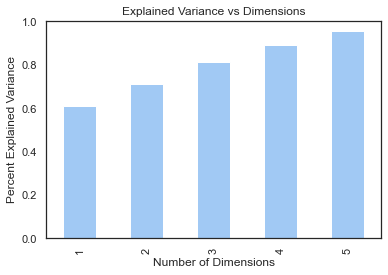

In [59]:
sns.set_context('notebook')
sns.set_palette('pastel')
sns.set_style('white')

ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of Dimensions',
       ylabel='Percent Explained Variance',
       title='Explained Variance vs Dimensions')

[Text(0, 0.5, 'Relative Importance'),
 Text(0.5, 0, 'Number of Dimensions'),
 Text(0.5, 1.0, 'Feature Importance vs Dimensions')]

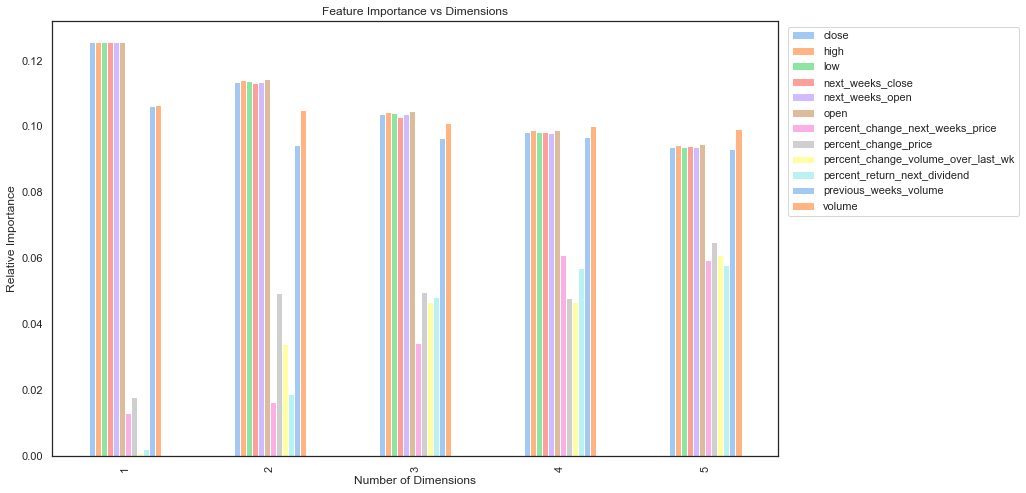

In [60]:
sns.set_context('notebook')
sns.set_palette('pastel')
sns.set_style('white')

ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(bbox_to_anchor=(1.34, 1), loc='upper right', ncol=1)
ax.set(xlabel='Number of Dimensions',
       ylabel='Relative Importance',
       title='Feature Importance vs Dimensions')